Practical 3:Descriptive Statistics - Measures of Central Tendency and variability
Perform the following operations on any open source dataset (e.g., data.csv)
1. Provide summary statistics (mean, median, minimum, maximum, standard deviation) for 
a dataset (age, income etc.) with numeric variables grouped by one of the qualitative 
(categorical) variable. For example, if your categorical variable is age groups and 
quantitative variable is income, then provide summary statistics of income grouped by the 
age groups. Create a list that contains a numeric value for each response to the categorical 
variable. 
2. Write a Python program to display some basic statistical details like percentile, mean, 
standard deviation etc. of the species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris-versicolor’ 
of iris.csv dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
df = pd.read_csv('Iris.csv')

# Data Preprocessing

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 6)

In [7]:
df.SepalLengthCm.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# Group by species and calculate summary statistics for petal length
df.groupby('Species')['PetalLengthCm'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()

,Species,mean,median,min,max,std
0,Iris-setosa,1.464,1.50,1.0,1.9,0.173511
1,Iris-versicolor,4.260,4.35,3.0,5.1,0.469911
2,Iris-virginica,5.552,5.55,4.5,6.9,0.551895


In [11]:
df['Species'].astype('category').cat.codes.unique().tolist()

[0, 1, 2]

# Data Visualization

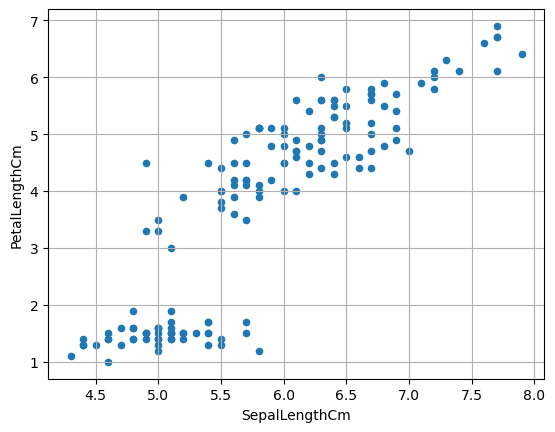

In [12]:

df.plot(kind ="scatter",x ='SepalLengthCm', y ='PetalLengthCm')
plt.grid()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


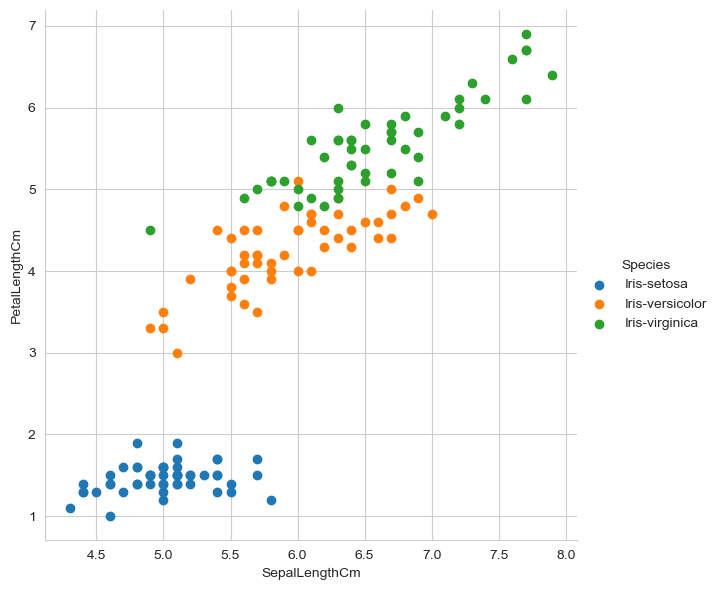

In [13]:
sns.set_style("whitegrid")

sns.FacetGrid(df, hue ="Species", height = 6).map(plt.scatter, 'SepalLengthCm', 'PetalLengthCm').add_legend()

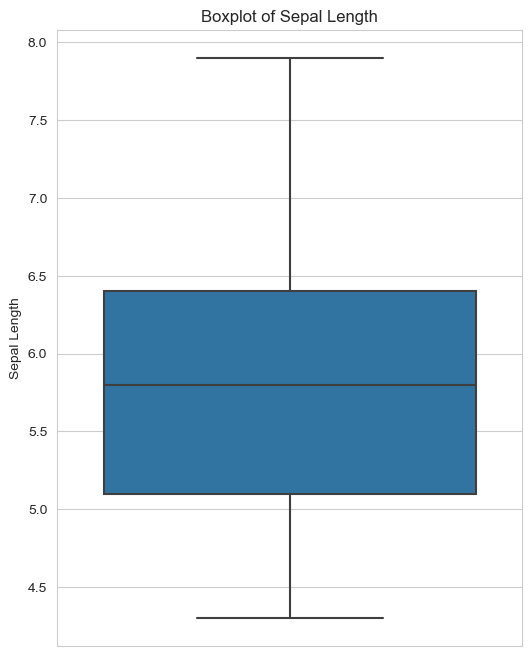

In [14]:
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['SepalLengthCm'])
plt.ylabel('Sepal Length')
plt.title('Boxplot of Sepal Length')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


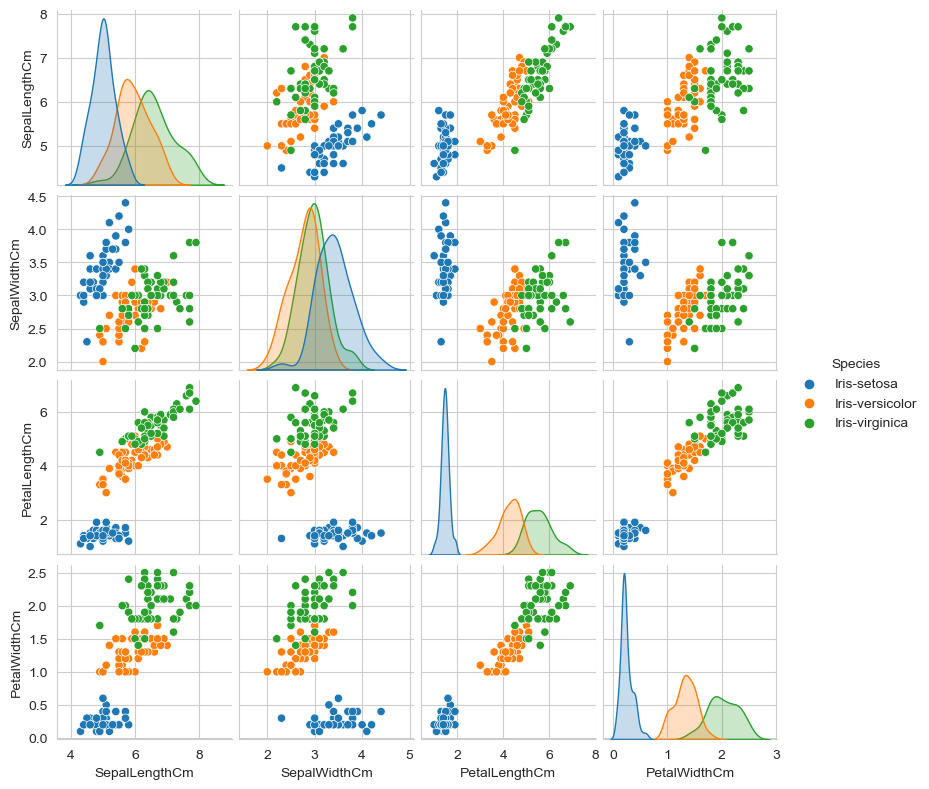

In [15]:
sns.pairplot(df.drop(['Id'], axis = 1), hue='Species', height=2)

(array([ 1.,  3.,  4.,  3.,  8., 14., 14., 10., 26., 12., 19., 12.,  6.,
         3.,  9.,  2.,  1.,  1.,  1.,  1.]),
 array([2.  , 2.12, 2.24, 2.36, 2.48, 2.6 , 2.72, 2.84, 2.96, 3.08, 3.2 ,
        3.32, 3.44, 3.56, 3.68, 3.8 , 3.92, 4.04, 4.16, 4.28, 4.4 ]),
 <BarContainer object of 20 artists>)

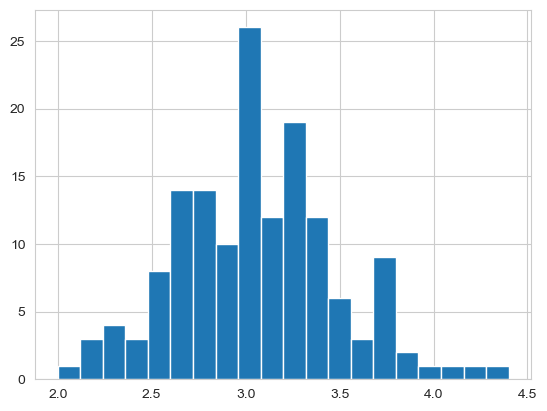

In [16]:
plt.hist(df['SepalWidthCm'], bins=20)

In [17]:
def removingOutliersIQR(columnName, df):
    Q1 = df[columnName].quantile(0.25)
    Q3 = df[columnName].quantile(0.75)

    IQR = Q3 - Q1

    lowerLimit = Q1 - 1.5*IQR
    upperlimit = Q3 + 1.5*IQR

    df = df[(df[columnName] >= lowerLimit) & (df[columnName] <= upperlimit)]

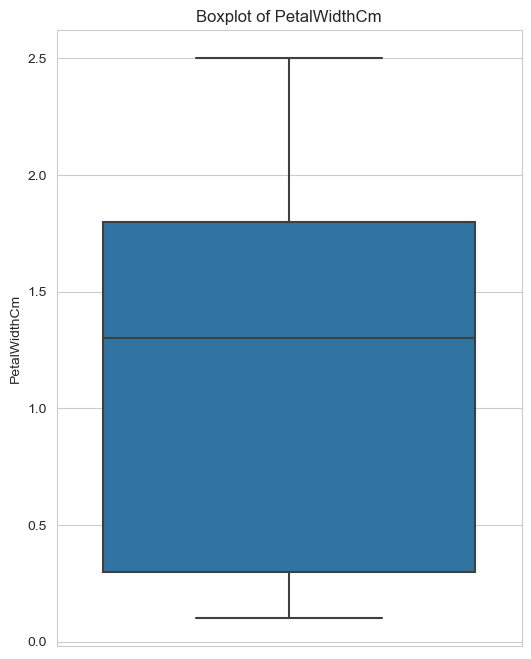

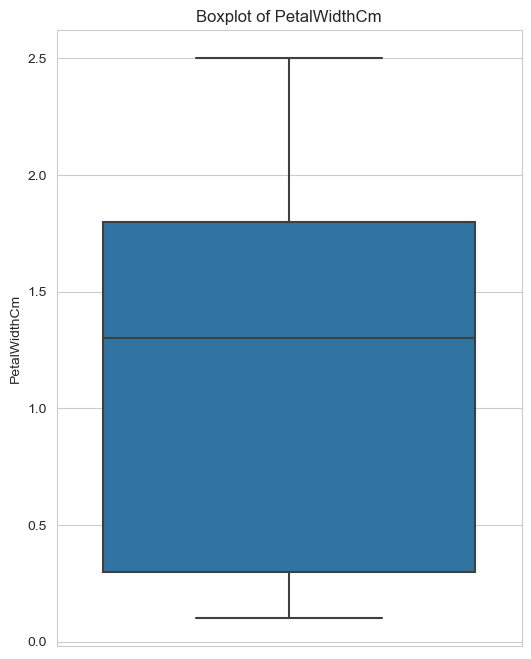

In [18]:
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['PetalWidthCm'])
plt.ylabel('PetalWidthCm')
plt.title('Boxplot of PetalWidthCm')
plt.show()

removingOutliersIQR(columnName='PetalWidthCm', df=df)

plt.figure(figsize=(6, 8))
sns.boxplot(y=df['PetalWidthCm'])
plt.ylabel('PetalWidthCm')
plt.title('Boxplot of PetalWidthCm')
plt.show()

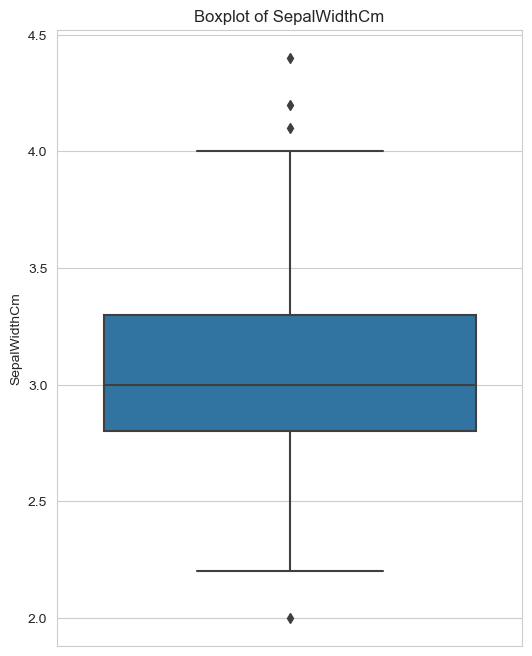

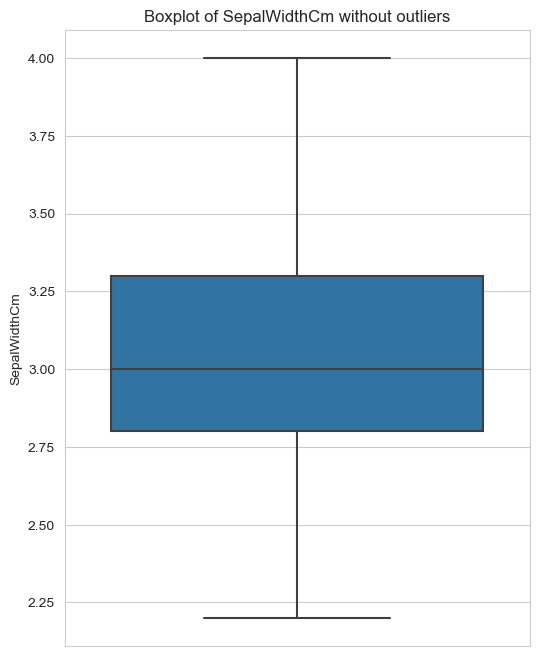

In [19]:
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['SepalWidthCm'])
plt.ylabel('SepalWidthCm')
plt.title('Boxplot of SepalWidthCm')
plt.show()

# Calculate IQR
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

# Define limits to identify outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['SepalWidthCm'] >= lower_limit) & (df['SepalWidthCm'] <= upper_limit)]

# Create a boxplot again without outliers
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['SepalWidthCm'])
plt.ylabel('SepalWidthCm')
plt.title('Boxplot of SepalWidthCm without outliers')
plt.show()

In [20]:
df.groupby("Species").describe().sum()



Id             count    146.000000
               mean     226.657620
               std       44.038989
               min      153.000000
               25%      189.750000
               50%      226.500000
               75%      264.250000
               max      300.000000
SepalLengthCm  count    146.000000
               mean      17.519698
               std        1.478160
               min       14.100000
               25%       16.625000
               50%       17.400000
               75%       18.300000
               max       20.700000
SepalWidthCm   count    146.000000
               mean       9.125672
               std        0.946894
               min        6.700000
               25%        8.500000
               50%        9.200000
               75%        9.725000
               max       11.200000
PetalLengthCm  count    146.000000
               mean      11.291340
               std        1.192236
               min        8.500000
               25%  